In [1]:
import sys
import numpy as np
import pandas as pd
# import pyqtgraph as pg
import cnmodel as cnm
from cnmodel import populations
from cnmodel.protocols import IVCurve
from neuron import h
import matplotlib.pyplot as plt
import scipy

--No graphics will be displayed.



  [soma] find_i0  Species: mouse  cell type: I-c  Temp   22.0
    *** found V0 = -63.928681
    *** and cell has mechanisms:  ['kht', 'ka', 'ihvcn', 'leak', 'nacn']


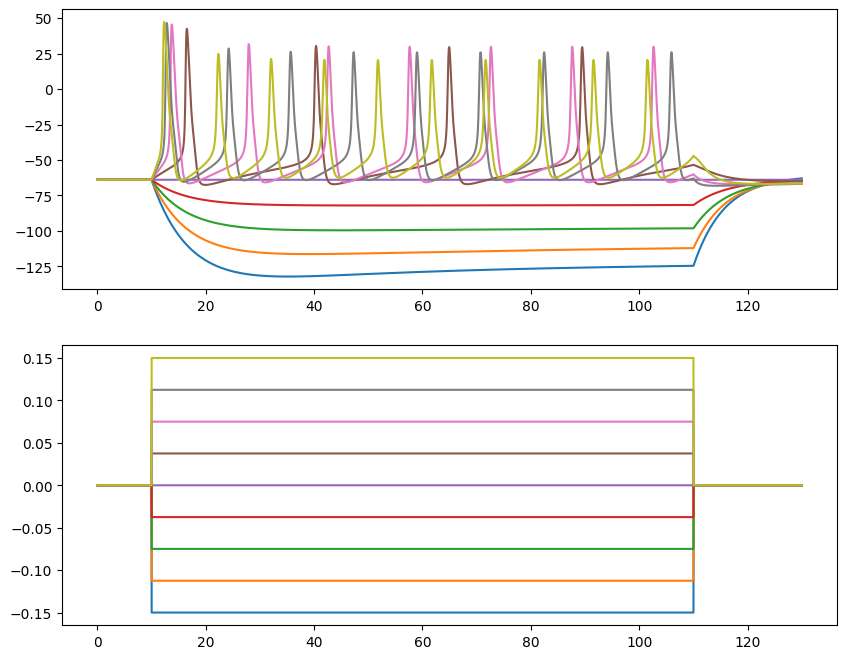

In [2]:
ic_cell = cnm.cells.IC.create()
v0 = ic_cell.find_i0(showinfo=True)
ic_cell.set_temperature(float(34))
iv = IVCurve()
iv.reset()
iv.run({'pulse': [(-0.15, 0.16, 0.0375)]},
       ic_cell, durs=[10, 100, 20],
       sites=None, reppulse=None, temp=float(34))

fig, axs = plt.subplots(2,1, figsize=(10,8))
axs.ravel()

for i, voltage_trace in enumerate(iv.voltage_traces):

    axs[0].plot(iv.time_values, voltage_trace)
    axs[1].plot(iv.time_values, iv.current_traces[i])


In [3]:
ic = populations.IC()
pyramidal = populations.Pyramidal(synapsetype='simple')
vertical = populations.Tuberculoventral()

ic.connect(vertical, pyramidal)
pyramidal.connect(ic)
pyramidal_cell_id = ic.select(1, cf=16e3, create=True)


In [8]:
pyramidal.resolve_inputs(depth=2)

In [5]:
ic.resolve_inputs(depth=1)
pyramidal.resolve_inputs(depth=1)
vertical.resolve_inputs(depth=1)

In [6]:
pyramidal_cell = ic.get_cell(pyramidal_cell_id)

In [7]:
for pyr_id in pyramidal.real_cells():
    print(f"cell {pyr_id} - {pyramidal._get_cf_array('rat')[pyr_id]} Hz")

cell 1924 - 11230.368274610419 Hz
cell 2010 - 12906.26814755217 Hz
cell 2014 - 12990.034284146597 Hz
cell 2016 - 13032.12100912157 Hz
cell 2046 - 13680.034846269567 Hz
cell 2060 - 13993.322720891325 Hz
cell 2127 - 15594.874094262415 Hz
cell 2134 - 15772.433175926939 Hz
cell 2178 - 16935.750317999493 Hz
cell 2211 - 17864.20739171834 Hz
cell 2234 - 18541.25079695891 Hz
cell 2258 - 19275.103030945695 Hz
cell 2290 - 20298.951901195574 Hz
cell 2305 - 20797.42967078456 Hz
cell 2360 - 22732.219826059787 Hz


In [6]:
for cell_id in vertical.real_cells():
    print(f"cell {cell_id} - {vertical._get_cf_array('mouse')[cell_id]} Hz")

In [14]:
for cell_id in ic.real_cells():
    print(f"cell {cell_id} - {ic._get_cf_array('mouse')[cell_id]} Hz")

cell 1698 - 7792.034148344985 Hz
cell 1743 - 8380.289016797338 Hz
cell 1745 - 8407.440517043275 Hz
cell 1756 - 8558.353874279714 Hz
cell 1786 - 8983.846846181512 Hz
cell 1800 - 9189.5868399751 Hz
cell 1813 - 9384.847703616226 Hz
cell 1817 - 9445.758605642395 Hz
cell 1830 - 9646.462621524824 Hz
cell 1841 - 9819.616396055731 Hz
cell 1845 - 9883.349097014132 Hz
cell 1856 - 10060.754978143657 Hz
cell 1865 - 10208.271266649506 Hz
cell 1872 - 10324.499923612853 Hz
cell 1874 - 10357.95051960701 Hz
cell 1880 - 10458.953977615438 Hz
cell 1893 - 10681.186426365823 Hz
cell 1903 - 10855.342446523491 Hz
cell 1910 - 10978.938483548742 Hz
cell 1912 - 11014.509410797042 Hz
cell 1920 - 11157.949330801715 Hz
cell 1935 - 11431.953117927167 Hz
cell 1942 - 11562.11429043691 Hz
cell 1943 - 11580.829330164568 Hz
cell 1948 - 11674.859907729848 Hz
cell 1949 - 11693.757443379422 Hz
cell 1956 - 11826.899450189085 Hz
cell 1960 - 11903.660111249812 Hz
cell 1961 - 11922.927994812493 Hz
cell 1962 - 11942.22706637395